In [7]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [8]:
# Generate a dataset with 100 samples, 2 features, and 2 classes
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

In [9]:
# Train a decision tree to full depth
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

DecisionTreeClassifier(random_state=42)

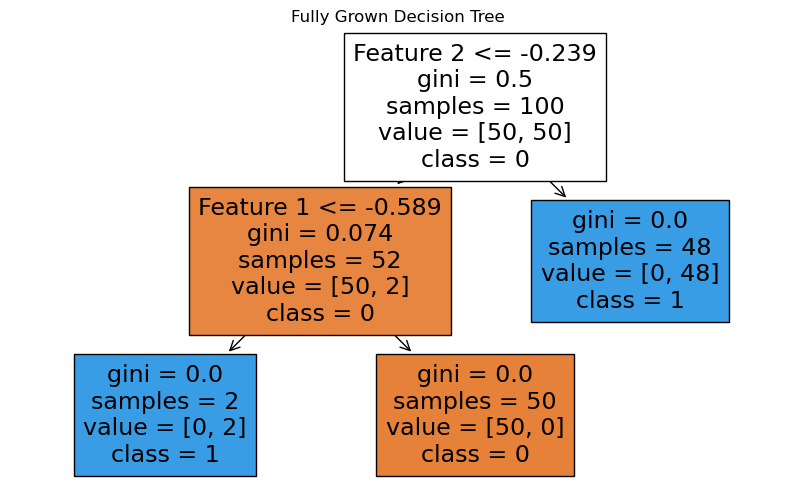

In [10]:
# Plot the full tree
plt.figure(figsize=(10, 6))
plot_tree(clf, filled=True, feature_names=['Feature 1', 'Feature 2'], class_names=['0', '1'])
plt.title("Fully Grown Decision Tree")
plt.show()

In [12]:
# Apply cost complexity pruning
path = clf.cost_complexity_pruning_path(X, y)

ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas, impurities

(array([0.        , 0.03846154, 0.46153846]),
 array([0.        , 0.03846154, 0.5       ]))

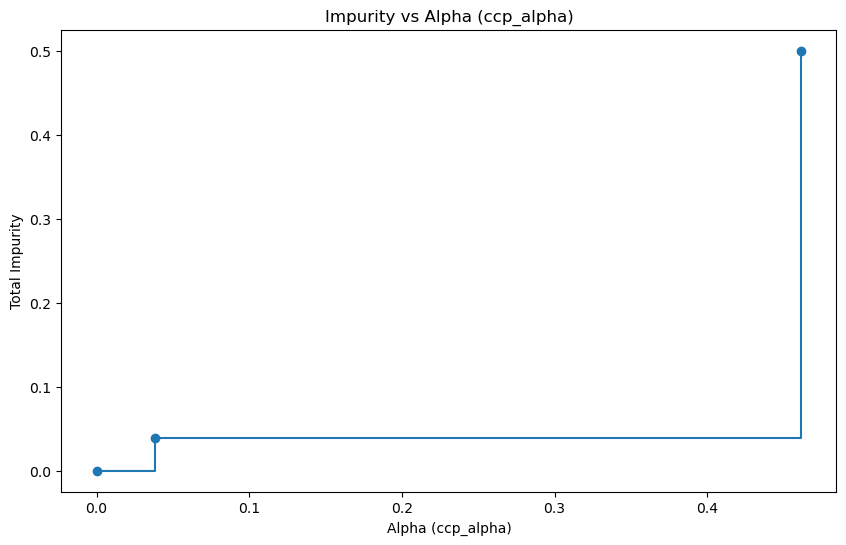

In [13]:
# Plot ccp_alphas vs impurities
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities, marker='o', drawstyle='steps-post')
plt.xlabel('Alpha (ccp_alpha)')
plt.ylabel('Total Impurity')
plt.title('Impurity vs Alpha (ccp_alpha)')
plt.show()

In [14]:
# Print the values for clarity
for alpha, impurity in zip(ccp_alphas, impurities):
    print(f"ccp_alpha: {alpha:.4f}, impurity: {impurity:.4f}")

ccp_alpha: 0.0000, impurity: 0.0000
ccp_alpha: 0.0385, impurity: 0.0385
ccp_alpha: 0.4615, impurity: 0.5000


# Explanation:
"""
1. **ccp_alpha: 0.0000, impurity: 0.0000**
   - This represents the fully grown decision tree with no pruning applied.
   - The impurity is `0.0000`, indicating that the tree has perfectly classified all samples in the training set with no error.
   - This is the starting point where the tree is at its most complex and detailed.

2. **ccp_alpha: 0.0385, impurity: 0.0385**
   - This value of `ccp_alpha` corresponds to a pruned tree where some nodes have been removed to simplify the tree.
   - The impurity has increased to `0.0385`, showing that pruning has introduced some misclassification or mixed classes in the leaves.
   - This indicates that the tree has been simplified, but it still retains some useful structure.

3. **ccp_alpha: 0.4615, impurity: 0.5000**
   - This `ccp_alpha` value represents a significantly pruned tree with a higher level of pruning applied.
   - The impurity has increased to `0.5000`, indicating that the tree is now more general and may have many leaves with mixed classes.
   - This suggests a high level of simplification, where the tree is less complex but may lose some classification accuracy.

# Summary:
- The `ccp_alpha` values represent the degree of pruning applied to the tree.
- The impurity values reflect how the total impurity of the tree changes with different levels of pruning.
- Lower `ccp_alpha` values (e.g., `0.0000`) correspond to less pruning and lower impurity (more accuracy), while higher `ccp_alpha` values (e.g., `0.4615`) correspond to more pruning and higher impurity (potentially less accuracy but simpler model).
"""